# HACK FOR PINK

Problem Statement :

Develop a technology solution that promotes and/or enhances the fight against breast cancer.

In [1]:
import pandas as pd 
df=pd.read_excel('D:\\ELC_Hackthon\\Breast_Cancer_Data.xlsx',sheet_name='Sheet4')

In [2]:
df

,Age,PHH,Diet,Obesity,Smoker,Alcohol_Consumption,Chest Radiation,Menstrual History,Worklife,Breasts_Swelling,Breasts_Shrinkage,Breasts_Dimpling,Breasts_Asymmetry,Skin_of_Breast,Breast Feels,Niple Discharge,Cancer_Probability
0,54,No,Healthy,Normal,yes,Yes,Yes,Late Menopause,Rotational,Both,No,0,A,Red,TenderNess,Milky,NaN
1,19,No,Junk,Obese,yes,Yes,Yes,Early Mensturation,Regular,No,No,2,S,Looks like Orange Skin,Normal,Milky,NaN
2,53,No,Healthy,Obese,no,No,No,Late Child,Night,Both,Both,1,S,Scaly,Lump,Bloody,NaN
3,56,No,Healthy,Obese,yes,No,No,Late Menopause,Night,No,One,0,A,Looks like Orange Skin,Thickness,Clear,NaN
4,40,Yes,Healthy,Normal,yes,Yes,Yes,Normal,Night,One,One,0,A,Swollen,Lump,Milky,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,30,No,Junk,Normal,no,No,Yes,Normal,Night,No,One,0,A,Normal,Thickness,Milky,NaN
1339,58,Yes,Junk,Obese,no,No,Yes,Late Menopause,Night,One,No,1,S,Swollen,Normal,Clear,NaN
1340,33,No,Healthy,Normal,yes,Yes,Yes,Normal,Morning,One,No,2,A,Looks like Orange Skin,Lump,Clear,NaN
1341,42,Yes,Healthy,Overweight,no,Yes,No,Early Mensturation,Morning,One,One,3,A,Normal,Normal,Bloody,NaN


In [3]:
df['PHH_Val']=df['PHH'].apply(lambda x : 0.06 if x == 'Yes' else 0)
df['Diet_Val']=df['Diet'].apply(lambda x : 0.02 if x == 'Junk' else 0)
df['Obesity_Val']=df['Obesity'].apply(lambda x : 0.02 if x == 'Obese' else 0)
df['Smoker_Val']=df['Smoker'].apply(lambda x : 0.02 if x == 'yes' else 0)
df['Alcohol_Consumption_Val']=df['Alcohol_Consumption'].apply(lambda x : 0.02 if x == 'Yes' else 0)
df['Chest Radiation_Val']=df['Chest Radiation'].apply(lambda x : 0.2 if x == 'Yes' else 0)
df['Menstrual History_Val']=df['Menstrual History'].apply(lambda x : 0.04 if x != 'Normal' else 0)
df['Worklife_Val']=df['Worklife'].apply(lambda x : 0.02 if x != 'Regular' else 0)
df['Breasts_Swelling_Val']=df.Breasts_Swelling.apply(lambda x : 0.06 if x != 'No'  else 0)
df['Breasts_Shrinkage_Val']=df.Breasts_Shrinkage.apply(lambda x : 0.06 if x != 'No'  else 0)
df['Breasts_Dimpling_Val']=df.Breasts_Dimpling.apply(lambda x : 0.06 if x != 0 else 0)
df['Breasts_Asymmetry_Val']=df.Breasts_Asymmetry.apply(lambda x : 0.03 if x == 'A' else 0)
df['Skin_of_Breast_Val']=df.Skin_of_Breast.apply(lambda x : 0.09 if x != 'Normal' else 0)
df['Breast Feels_Val']=df['Breast Feels'].apply(lambda x : 0.15 if x != 'Normal' else 0)
df['Niple Discharge_Val']=df['Niple Discharge'].apply(lambda x : 0.15 if (x == 'Clear') or (x == 'Bloody') else 0)

In [4]:
df['Cancer_Probability']=df['PHH_Val']+df['Diet_Val']+df['Obesity_Val']+df['Smoker_Val']+df['Alcohol_Consumption_Val']+df['Chest Radiation_Val']+df['Menstrual History_Val']+df['Worklife_Val']+df['Breasts_Swelling_Val']+df['Breasts_Shrinkage_Val']+df['Breasts_Dimpling_Val']+df['Breasts_Asymmetry_Val']+df['Skin_of_Breast_Val']+df['Breast Feels_Val']+df['Niple Discharge_Val']

In [5]:
df.to_csv('D:\\ELC_Hackthon\\Breast_Cancer_Data_Value.csv')

In [6]:
mydf=pd.read_csv('D:\\ELC_Hackthon\\Breast_Cancer_Data_Value.csv')

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
for value in ['Breasts_Swelling','Breasts_Shrinkage','Breasts_Dimpling','Breasts_Asymmetry','Skin_of_Breast','Breast Feels','Niple Discharge']:
    print('Unique_Values in '+ value +'Feature :',mydf[value].unique())
    print(len(mydf[value].unique()))
    for category in mydf[value].unique():
        print('Percentage of '+ str(category) + ':', (len(mydf[mydf[value]==category])/len(mydf[value]))*100)
    print('******************************')

Unique_Values in Breasts_SwellingFeature : ['Both' 'No' 'One']
3
Percentage of Both: 32.91139240506329
Percentage of No: 34.4005956813105
Percentage of One: 32.688011913626205
******************************
Unique_Values in Breasts_ShrinkageFeature : ['No' 'Both' 'One']
3
Percentage of No: 34.177215189873415
Percentage of Both: 31.943410275502604
Percentage of One: 33.87937453462398
******************************
Unique_Values in Breasts_DimplingFeature : [0 2 1 3]
4
Percentage of 0: 26.209977661950855
Percentage of 2: 24.72077438570365
Percentage of 1: 23.752792256142964
Percentage of 3: 25.31645569620253
******************************
Unique_Values in Breasts_AsymmetryFeature : ['A' 'S']
2
Percentage of A: 51.67535368577811
Percentage of S: 48.324646314221894
******************************
Unique_Values in Skin_of_BreastFeature : ['Red' 'Looks like Orange Skin' 'Scaly' 'Swollen' 'Normal']
5
Percentage of Red: 20.402084884586746
Percentage of Looks like Orange Skin: 18.615040953090098

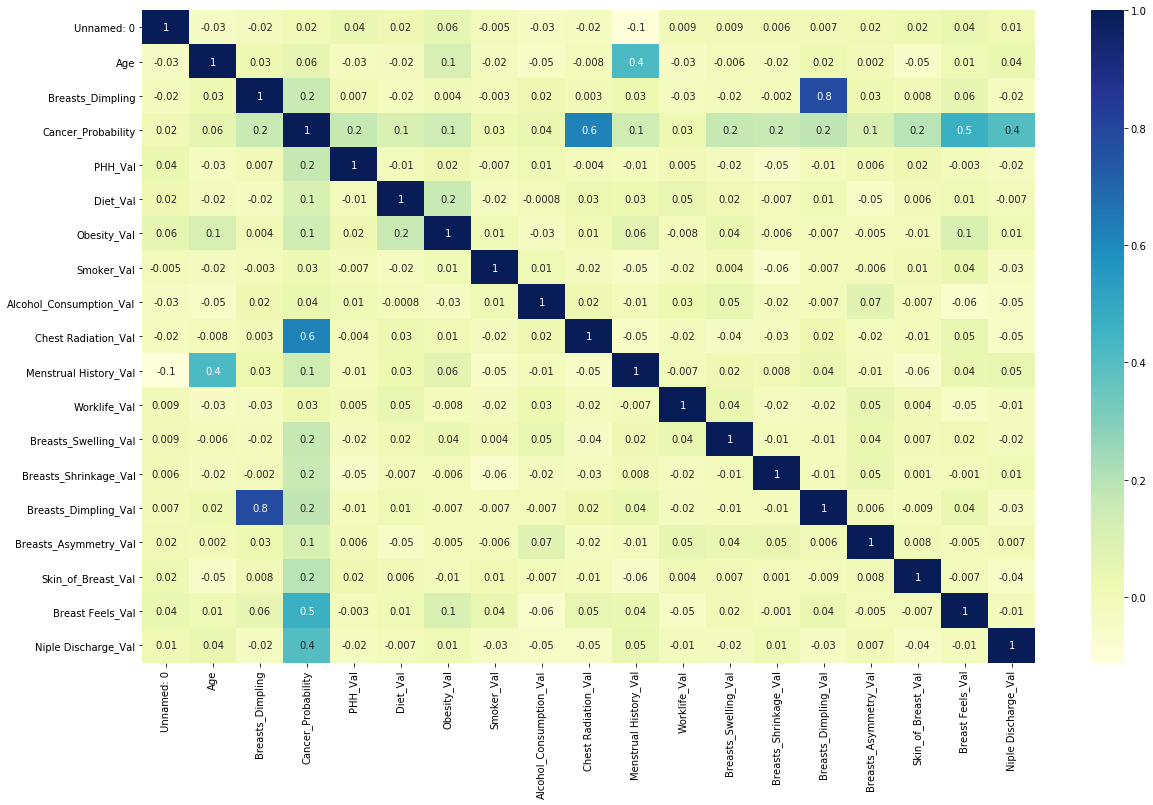

In [9]:
plt.figure(figsize = (20, 12))
sns.heatmap(mydf.corr(), annot = True, cmap="YlGnBu",fmt='.1g')
plt.show()

In [10]:
import pandas as pd 

cancer_df=pd.read_excel('D:\\ELC_Hackthon\\Breast_Cancer_Data.xlsx',sheet_name='Sheet5')

In [11]:
cancer_df

,Age,PHH,Diet,Obesity,Smoker,Alcohol_Consumption,Chest Radiation,Menstrual History,Worklife,Breasts_Swelling,Breasts_Shrinkage,Breasts_Dimpling,Breasts_Asymmetry,Skin_of_Breast,Breast Feels,Niple Discharge,Cancer_Probability
0,54,No,Healthy,Normal,yes,Yes,Yes,Late Menopause,Rotational,Both,No,0,A,Red,TenderNess,Milky,0.63
1,19,No,Junk,Obese,yes,Yes,Yes,Early Mensturation,Regular,No,No,2,S,Looks like Orange Skin,Normal,Milky,0.47
2,53,No,Healthy,Obese,no,No,No,Late Child,Night,Both,Both,1,S,Scaly,Lump,Bloody,0.65
3,56,No,Healthy,Obese,yes,No,No,Late Menopause,Night,No,One,0,A,Looks like Orange Skin,Thickness,Clear,0.58
4,40,Yes,Healthy,Normal,yes,Yes,Yes,Normal,Night,One,One,0,A,Swollen,Lump,Milky,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,30,No,Junk,Normal,no,No,Yes,Normal,Night,No,One,0,A,Normal,Thickness,Milky,0.48
1339,58,Yes,Junk,Obese,no,No,Yes,Late Menopause,Night,One,No,1,S,Swollen,Normal,Clear,0.72
1340,33,No,Healthy,Normal,yes,Yes,Yes,Normal,Morning,One,No,2,A,Looks like Orange Skin,Lump,Clear,0.80
1341,42,Yes,Healthy,Overweight,no,Yes,No,Early Mensturation,Morning,One,One,3,A,Normal,Normal,Bloody,0.50


In [12]:
cancer_df.drop(columns=['Age'])

,PHH,Diet,Obesity,Smoker,Alcohol_Consumption,Chest Radiation,Menstrual History,Worklife,Breasts_Swelling,Breasts_Shrinkage,Breasts_Dimpling,Breasts_Asymmetry,Skin_of_Breast,Breast Feels,Niple Discharge,Cancer_Probability
0,No,Healthy,Normal,yes,Yes,Yes,Late Menopause,Rotational,Both,No,0,A,Red,TenderNess,Milky,0.63
1,No,Junk,Obese,yes,Yes,Yes,Early Mensturation,Regular,No,No,2,S,Looks like Orange Skin,Normal,Milky,0.47
2,No,Healthy,Obese,no,No,No,Late Child,Night,Both,Both,1,S,Scaly,Lump,Bloody,0.65
3,No,Healthy,Obese,yes,No,No,Late Menopause,Night,No,One,0,A,Looks like Orange Skin,Thickness,Clear,0.58
4,Yes,Healthy,Normal,yes,Yes,Yes,Normal,Night,One,One,0,A,Swollen,Lump,Milky,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,No,Junk,Normal,no,No,Yes,Normal,Night,No,One,0,A,Normal,Thickness,Milky,0.48
1339,Yes,Junk,Obese,no,No,Yes,Late Menopause,Night,One,No,1,S,Swollen,Normal,Clear,0.72
1340,No,Healthy,Normal,yes,Yes,Yes,Normal,Morning,One,No,2,A,Looks like Orange Skin,Lump,Clear,0.80
1341,Yes,Healthy,Overweight,no,Yes,No,Early Mensturation,Morning,One,One,3,A,Normal,Normal,Bloody,0.50


In [13]:
#Get the dummy variables for the categorical feature and store it in a new Dataframe
cancer_df_Dummies = pd.get_dummies(cancer_df.drop(columns=['Age']),drop_first = True)
cancer_df_Dummies.shape

(1343, 35)

In [14]:
cancer_df_Dummies

,Breasts_Dimpling,Cancer_Probability,PHH_Yes,Diet_Junk,Diet_Normal,Obesity_Normal,Obesity_Obese,Obesity_Overweight,Obesity_Thinness,Smoker_yes,...,Skin_of_Breast_Normal,Skin_of_Breast_Red,Skin_of_Breast_Scaly,Skin_of_Breast_Swollen,Breast Feels_Normal,Breast Feels_TenderNess,Breast Feels_Thickness,Niple Discharge_Clear,Niple Discharge_Milky,Niple Discharge_Normal
0,0,0.63,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,2,0.47,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,1,0.65,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.58,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,0,0.71,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,0,0.48,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1339,1,0.72,1,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
1340,2,0.80,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1341,3,0.50,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import os

import statistics as stat

import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge,Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#hide warnings
import warnings
warnings.filterwarnings('ignore')
matplotlib.rc('figure', max_open_warning = 0)

In [16]:
scaler = StandardScaler()

numeric_headers=list(cancer_df_Dummies.columns.values)

numeric_headers

['Breasts_Dimpling',
 'Cancer_Probability',
 'PHH_Yes',
 'Diet_Junk',
 'Diet_Normal',
 'Obesity_Normal',
 'Obesity_Obese',
 'Obesity_Overweight',
 'Obesity_Thinness',
 'Smoker_yes',
 'Alcohol_Consumption_Yes',
 'Chest Radiation_Yes',
 'Menstrual History_Late Child',
 'Menstrual History_Late Menopause',
 'Menstrual History_Never Gave Birth',
 'Menstrual History_Normal',
 'Menstrual History_normal',
 'Worklife_Night',
 'Worklife_Regular',
 'Worklife_Rotational',
 'Breasts_Swelling_No',
 'Breasts_Swelling_One',
 'Breasts_Shrinkage_No',
 'Breasts_Shrinkage_One',
 'Breasts_Asymmetry_S',
 'Skin_of_Breast_Normal',
 'Skin_of_Breast_Red',
 'Skin_of_Breast_Scaly',
 'Skin_of_Breast_Swollen',
 'Breast Feels_Normal',
 'Breast Feels_TenderNess',
 'Breast Feels_Thickness',
 'Niple Discharge_Clear',
 'Niple Discharge_Milky',
 'Niple Discharge_Normal']

In [17]:
numeric_headers.remove('Cancer_Probability')

In [18]:
cancer_df_Dummies[numeric_headers]= scaler.fit_transform(cancer_df_Dummies[numeric_headers])
cancer_df_Dummies

,Breasts_Dimpling,Cancer_Probability,PHH_Yes,Diet_Junk,Diet_Normal,Obesity_Normal,Obesity_Obese,Obesity_Overweight,Obesity_Thinness,Smoker_yes,...,Skin_of_Breast_Normal,Skin_of_Breast_Red,Skin_of_Breast_Scaly,Skin_of_Breast_Swollen,Breast Feels_Normal,Breast Feels_TenderNess,Breast Feels_Thickness,Niple Discharge_Clear,Niple Discharge_Milky,Niple Discharge_Normal
0,-1.318022,0.63,-1.020310,-1.005226,-0.027298,1.557569,-0.902699,-0.551256,-0.119793,1.966200,...,-0.475903,1.975211,-0.516702,-0.522480,-0.599426,1.694201,-0.579930,-0.725353,1.390077,-0.027298
1,0.449430,0.47,-1.020310,0.994801,-0.027298,-0.642026,1.107789,-0.551256,-0.119793,1.966200,...,-0.475903,-0.506275,-0.516702,-0.522480,1.668262,-0.590249,-0.579930,-0.725353,1.390077,-0.027298
2,-0.434296,0.65,-1.020310,-1.005226,-0.027298,-0.642026,1.107789,-0.551256,-0.119793,-0.508595,...,-0.475903,-0.506275,1.935351,-0.522480,-0.599426,-0.590249,-0.579930,-0.725353,-0.719385,-0.027298
3,-1.318022,0.58,-1.020310,-1.005226,-0.027298,-0.642026,1.107789,-0.551256,-0.119793,1.966200,...,-0.475903,-0.506275,-0.516702,-0.522480,-0.599426,-0.590249,1.724347,1.378640,-0.719385,-0.027298
4,-1.318022,0.71,0.980094,-1.005226,-0.027298,1.557569,-0.902699,-0.551256,-0.119793,1.966200,...,-0.475903,-0.506275,-0.516702,1.913947,-0.599426,-0.590249,-0.579930,-0.725353,1.390077,-0.027298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,-1.318022,0.48,-1.020310,0.994801,-0.027298,1.557569,-0.902699,-0.551256,-0.119793,-0.508595,...,2.101267,-0.506275,-0.516702,-0.522480,-0.599426,-0.590249,1.724347,-0.725353,1.390077,-0.027298
1339,-0.434296,0.72,0.980094,0.994801,-0.027298,-0.642026,1.107789,-0.551256,-0.119793,-0.508595,...,-0.475903,-0.506275,-0.516702,1.913947,1.668262,-0.590249,-0.579930,1.378640,-0.719385,-0.027298
1340,0.449430,0.80,-1.020310,-1.005226,-0.027298,1.557569,-0.902699,-0.551256,-0.119793,1.966200,...,-0.475903,-0.506275,-0.516702,-0.522480,-0.599426,-0.590249,-0.579930,1.378640,-0.719385,-0.027298
1341,1.333157,0.50,0.980094,-1.005226,-0.027298,-0.642026,-0.902699,1.814038,-0.119793,-0.508595,...,2.101267,-0.506275,-0.516702,-0.522480,1.668262,-0.590249,-0.579930,-0.725353,-0.719385,-0.027298


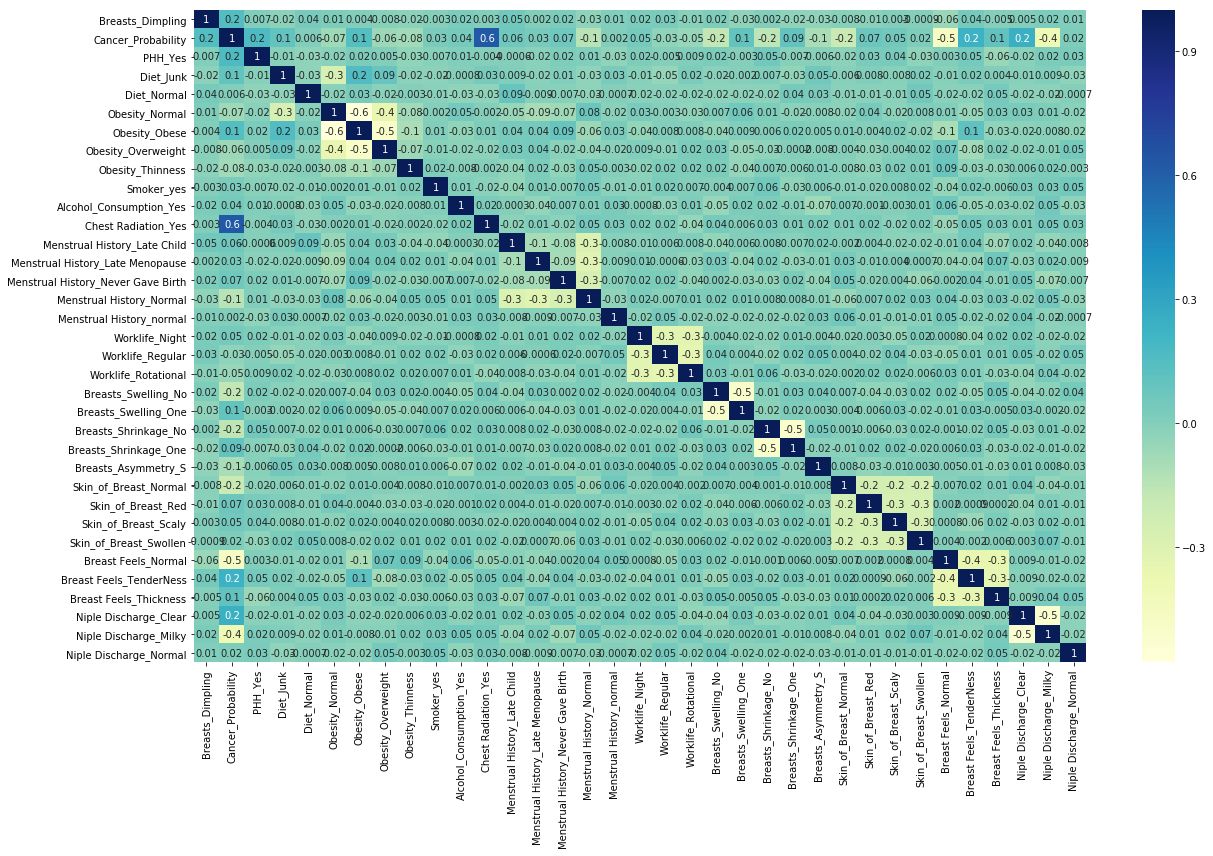

In [19]:
plt.figure(figsize = (20, 12))
sns.heatmap(cancer_df_Dummies.corr(), annot = True, cmap="YlGnBu",fmt='.1g')
plt.show()

In [20]:
X= cancer_df_Dummies.drop('Cancer_Probability',axis=1)
y= cancer_df_Dummies['Cancer_Probability']

In [21]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
print('" Shape of Post Train-Test Split " X_train : {0}, X_test : {1}, y_train : {2}, y_test : {3}'.format(X_train.shape, X_test.shape,y_train.shape,y_test.shape))

" Shape of Post Train-Test Split " X_train : (940, 34), X_test : (403, 34), y_train : (940,), y_test : (403,)


In [23]:
X_train

,Breasts_Dimpling,PHH_Yes,Diet_Junk,Diet_Normal,Obesity_Normal,Obesity_Obese,Obesity_Overweight,Obesity_Thinness,Smoker_yes,Alcohol_Consumption_Yes,...,Skin_of_Breast_Normal,Skin_of_Breast_Red,Skin_of_Breast_Scaly,Skin_of_Breast_Swollen,Breast Feels_Normal,Breast Feels_TenderNess,Breast Feels_Thickness,Niple Discharge_Clear,Niple Discharge_Milky,Niple Discharge_Normal
1057,-1.318022,0.980094,-1.005226,-0.027298,-0.642026,1.107789,-0.551256,-0.119793,-0.508595,-1.017275,...,-0.475903,-0.506275,-0.516702,1.913947,-0.599426,-0.590249,-0.579930,1.378640,-0.719385,-0.027298
972,-1.318022,0.980094,0.994801,-0.027298,-0.642026,-0.902699,1.814038,-0.119793,1.966200,0.983018,...,-0.475903,1.975211,-0.516702,-0.522480,1.668262,-0.590249,-0.579930,-0.725353,1.390077,-0.027298
685,-0.434296,0.980094,0.994801,-0.027298,-0.642026,-0.902699,1.814038,-0.119793,-0.508595,0.983018,...,-0.475903,1.975211,-0.516702,-0.522480,-0.599426,-0.590249,-0.579930,-0.725353,1.390077,-0.027298
155,1.333157,0.980094,-1.005226,-0.027298,1.557569,-0.902699,-0.551256,-0.119793,1.966200,0.983018,...,2.101267,-0.506275,-0.516702,-0.522480,1.668262,-0.590249,-0.579930,-0.725353,-0.719385,-0.027298
1158,-1.318022,0.980094,0.994801,-0.027298,-0.642026,-0.902699,1.814038,-0.119793,1.966200,-1.017275,...,-0.475903,1.975211,-0.516702,-0.522480,-0.599426,-0.590249,-0.579930,-0.725353,1.390077,-0.027298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,-1.318022,-1.020310,0.994801,-0.027298,1.557569,-0.902699,-0.551256,-0.119793,-0.508595,-1.017275,...,-0.475903,1.975211,-0.516702,-0.522480,1.668262,-0.590249,-0.579930,1.378640,-0.719385,-0.027298
53,1.333157,0.980094,-1.005226,-0.027298,-0.642026,1.107789,-0.551256,-0.119793,-0.508595,0.983018,...,2.101267,-0.506275,-0.516702,-0.522480,-0.599426,-0.590249,1.724347,1.378640,-0.719385,-0.027298
350,-0.434296,0.980094,-1.005226,-0.027298,1.557569,-0.902699,-0.551256,-0.119793,-0.508595,-1.017275,...,-0.475903,1.975211,-0.516702,-0.522480,-0.599426,1.694201,-0.579930,-0.725353,1.390077,-0.027298
79,1.333157,-1.020310,-1.005226,-0.027298,-0.642026,1.107789,-0.551256,-0.119793,-0.508595,0.983018,...,-0.475903,1.975211,-0.516702,-0.522480,-0.599426,-0.590249,1.724347,-0.725353,1.390077,-0.027298


In [24]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [25]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Breasts_Dimpling', True, 1),
 ('PHH_Yes', True, 1),
 ('Diet_Junk', False, 2),
 ('Diet_Normal', False, 17),
 ('Obesity_Normal', False, 7),
 ('Obesity_Obese', False, 4),
 ('Obesity_Overweight', False, 8),
 ('Obesity_Thinness', False, 22),
 ('Smoker_yes', False, 6),
 ('Alcohol_Consumption_Yes', False, 3),
 ('Chest Radiation_Yes', True, 1),
 ('Menstrual History_Late Child', False, 13),
 ('Menstrual History_Late Menopause', False, 9),
 ('Menstrual History_Never Gave Birth', False, 11),
 ('Menstrual History_Normal', True, 1),
 ('Menstrual History_normal', False, 19),
 ('Worklife_Night', False, 18),
 ('Worklife_Regular', False, 5),
 ('Worklife_Rotational', False, 10),
 ('Breasts_Swelling_No', True, 1),
 ('Breasts_Swelling_One', False, 21),
 ('Breasts_Shrinkage_No', True, 1),
 ('Breasts_Shrinkage_One', False, 24),
 ('Breasts_Asymmetry_S', True, 1),
 ('Skin_of_Breast_Normal', True, 1),
 ('Skin_of_Breast_Red', False, 15),
 ('Skin_of_Breast_Scaly', False, 23),
 ('Skin_of_Breast_Swollen', False

In [27]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['Breasts_Dimpling', 'PHH_Yes', 'Chest Radiation_Yes',
       'Menstrual History_Normal', 'Breasts_Swelling_No',
       'Breasts_Shrinkage_No', 'Breasts_Asymmetry_S', 'Skin_of_Breast_Normal',
       'Breast Feels_Normal', 'Niple Discharge_Milky'],
      dtype='object')

In [28]:
X_train_rfe = X_train[col_sup]
X_test_rfe = X_test[col_sup]

In [29]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation :

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results[['param_alpha','params','mean_test_score','mean_train_score']]

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


,param_alpha,params,mean_test_score,mean_train_score
0,0.0001,{'alpha': 0.0001},-0.022069,-0.021743
1,0.001,{'alpha': 0.001},-0.022069,-0.021743
2,0.01,{'alpha': 0.01},-0.022069,-0.021743
3,0.05,{'alpha': 0.05},-0.022068,-0.021742
4,0.1,{'alpha': 0.1},-0.022068,-0.021742
5,0.2,{'alpha': 0.2},-0.022067,-0.021742
6,0.3,{'alpha': 0.3},-0.022066,-0.021741
7,0.4,{'alpha': 0.4},-0.022065,-0.021740
8,0.5,{'alpha': 0.5},-0.022064,-0.021740
9,0.6,{'alpha': 0.6},-0.022064,-0.021739


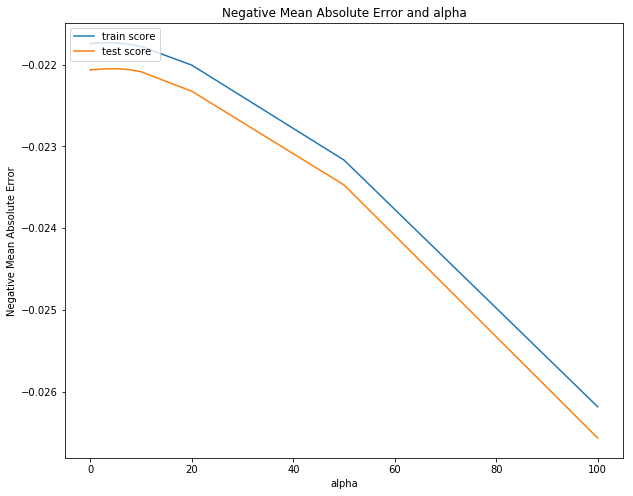

In [30]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [31]:
alpha = 0.0001
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
y_pred_ridge_train=ridge.predict(X_train_rfe)
print('Train R2 Square : ',round(r2_score(y_train,y_pred_ridge_train),2))
y_pred_ridge_test=ridge.predict(X_test_rfe)
print('Test R2 Square : ',round(r2_score(y_test,y_pred_ridge_test),2))

Train R2 Square :  0.97
Test R2 Square :  0.97


In [32]:
y_pred_ridge_test

array([0.78469779, 0.56156206, 0.51644287, 0.70544489, 0.79217498,
       0.48616442, 0.71835164, 0.54631472, 0.71613911, 0.49895277,
       0.53593589, 0.3655108 , 0.60725806, 0.44050955, 0.319046  ,
       0.86073126, 0.36684679, 0.89020422, 0.72005249, 0.54936509,
       0.4827867 , 0.75402667, 0.7478246 , 0.51831543, 0.40959198,
       0.66890178, 0.73653327, 0.68178578, 0.56160582, 0.89813495,
       0.58821011, 0.51555195, 0.7478246 , 0.74622124, 0.80246215,
       0.91353598, 0.5455701 , 0.58675571, 0.61083209, 0.63411144,
       0.43142316, 0.63781077, 0.6626997 , 0.72097121, 0.66230705,
       0.45171544, 0.41061932, 0.52709597, 0.66835658, 0.75917177,
       0.68558639, 0.46738568, 0.63951426, 0.52388283, 0.36330849,
       0.80743817, 0.60196666, 0.69297193, 0.7414074 , 0.84969948,
       0.53239759, 0.75917177, 0.61587342, 0.84853429, 0.30167429,
       0.60463848, 0.7837706 , 0.30694918, 0.55203691, 0.92087534,
       0.85339191, 0.90311097, 0.6133455 , 0.78544241, 0.65423

In [33]:
y_test

12      0.78
1329    0.56
320     0.53
479     0.68
157     0.81
        ... 
301     0.73
552     0.61
515     0.58
389     0.46
721     0.41
Name: Cancer_Probability, Length: 403, dtype: float64

In [34]:
df=pd.DataFrame(columns=X_train_rfe.columns.values)

In [35]:
#df.to_csv('D:\\ELC_Hackthon\\df.csv')

In [50]:
test_df=pd.read_csv('D:\\ELC_Hackthon\\df.csv')

In [51]:
mylist=list(test_df.columns.values)
mylist

['Breasts_Dimpling',
 'PHH_Yes',
 'Chest Radiation_Yes',
 'Menstrual History_Normal',
 'Breasts_Swelling_No',
 'Breasts_Shrinkage_No',
 'Breasts_Asymmetry_S',
 'Skin_of_Breast_Normal',
 'Breast Feels_Normal',
 'Niple Discharge_Milky']

In [52]:
test_df

,Breasts_Dimpling,PHH_Yes,Chest Radiation_Yes,Menstrual History_Normal,Breasts_Swelling_No,Breasts_Shrinkage_No,Breasts_Asymmetry_S,Skin_of_Breast_Normal,Breast Feels_Normal,Niple Discharge_Milky
0,0,0,0,1,1,1,1,1,1,0
1,1,0,1,0,1,0,1,0,1,0
2,2,1,1,1,0,1,0,1,0,1
3,3,1,1,0,0,0,0,0,0,1
4,1,1,0,0,0,1,0,0,0,1
5,0,0,1,1,1,1,1,1,1,0
6,3,1,1,0,0,0,0,0,0,0


In [53]:
scaler1=StandardScaler()
test_df[mylist]= scaler1.fit_transform(test_df[mylist])
test_df

,Breasts_Dimpling,PHH_Yes,Chest Radiation_Yes,Menstrual History_Normal,Breasts_Swelling_No,Breasts_Shrinkage_No,Breasts_Asymmetry_S,Skin_of_Breast_Normal,Breast Feels_Normal,Niple Discharge_Milky
0,-1.212678,-1.154701,-1.581139,1.154701,1.154701,0.866025,1.154701,1.154701,1.154701,-0.866025
1,-0.363803,-1.154701,0.632456,-0.866025,1.154701,-1.154701,1.154701,-0.866025,1.154701,-0.866025
2,0.485071,0.866025,0.632456,1.154701,-0.866025,0.866025,-0.866025,1.154701,-0.866025,1.154701
3,1.333946,0.866025,0.632456,-0.866025,-0.866025,-1.154701,-0.866025,-0.866025,-0.866025,1.154701
4,-0.363803,0.866025,-1.581139,-0.866025,-0.866025,0.866025,-0.866025,-0.866025,-0.866025,1.154701
5,-1.212678,-1.154701,0.632456,1.154701,1.154701,0.866025,1.154701,1.154701,1.154701,-0.866025
6,1.333946,0.866025,0.632456,-0.866025,-0.866025,-1.154701,-0.866025,-0.866025,-0.866025,-0.866025


In [54]:
y_pred_ridge_test_df=ridge.predict(test_df)

In [55]:
y_pred_ridge_test_df

array([0.24110573, 0.64966791, 0.64565603, 0.82992198, 0.51636454,
       0.46540196, 0.97164552])

In [56]:
outcome=[]
for value in y_pred_ridge_test_df:
    if value >= 0.60:
        outcome.append('')
    elif value >0.40 and value < 0.60:
        outcome.append('Possible Breast Cancer Scenario')
    else:
        outcome.append('Need Awarness')
print(outcome)

['Need Awarness', 'Detected Breast Cancer', 'Detected Breast Cancer', 'Detected Breast Cancer', 'Possible Breast Cancer Scenario', 'Possible Breast Cancer Scenario', 'Detected Breast Cancer']
